<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/20210202_IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get install build-essential python-dev python-numpy \
python-numpy-dev python-scipy 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-numpy' instead of 'python-numpy-dev'
build-essential is already the newest version (12.4ubuntu1).
python-dev is already the newest version (2.7.15~rc1-1).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
Suggested packages:
  python-pil-doc python-pil-dbg python-scipy-doc
The following NEW packages will be installed:
  python-decorator python-olefile python-pil python-scipy
0 upgraded, 4 newly installed, 0 to remove and 13 not upgraded.
Need to get 10.0 MB of archives.
After this operation, 43.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-decorator all 4.1.2-1 [9,300 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-olefile all 0.45.1-1 [33.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 python-pil amd64 5.1.0-1ub

In [11]:
import sklearn as sk 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                                      # to plot graph
import seaborn as sns                                                # for intractve graphs
%matplotlib inline
from sklearn.linear_model import LogisticRegression                  # for Logistic regression
from sklearn.model_selection import train_test_split                # to split the data
from sklearn.metrics import accuracy_score                           #Accuracy score calculation
from sklearn.metrics import classification_report, confusion_matrix  # Classification report and confusion matrix
from sklearn.neighbors import KNeighborsClassifier                   # for K nearest neighbours
from sklearn import svm                                              #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier                      #for using Decision Tree Algoithm
import os
print(os.listdir("/content/drive/MyDrive/Data_Set/Iris"))

['Iris.csv', 'Mall_Customers.csv']


In [12]:
# df = pd.read_csv('../input/train.csv')
df = pd.read_csv('/content/drive/MyDrive/Data_Set/Iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
print("the total nuumber of rows {} and columns {} are present in this dataset :".format(df.shape[0], df.shape[1]))

the total nuumber of rows 150 and columns 6 are present in this dataset :


In [14]:
# First we will identify the predictor and target variable
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
#Check the data types of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [16]:
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cat_cols = ['Species']
# Check the levels in Speciies
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

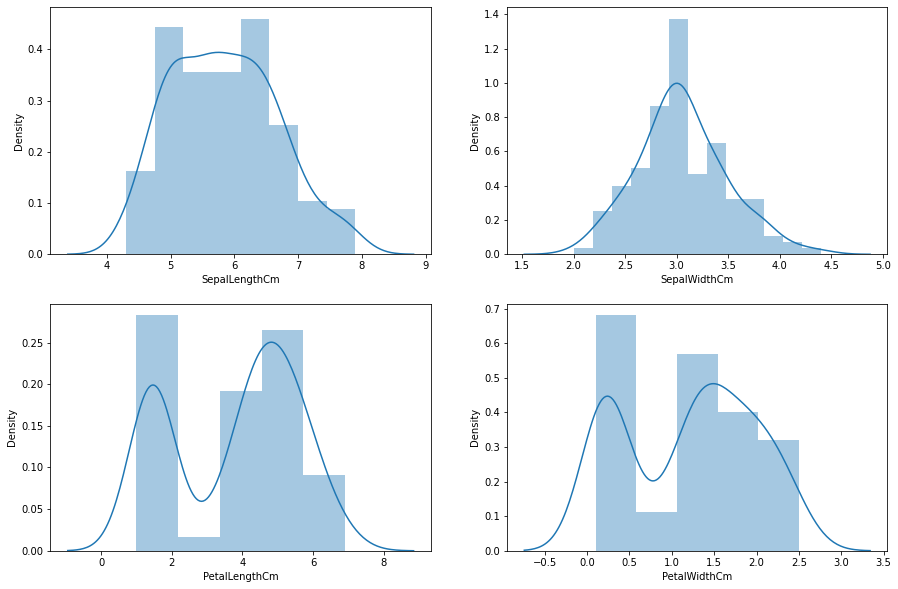

In [21]:
#Histogram plots for knowing the data distribution
plt.figure(1)
plt.figure(figsize = (15,10))
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in num_cols:
  plt.subplot(int(str(22)+str((num_cols.index(col)+1))))
  sns.distplot(df[col])      

<Figure size 432x288 with 0 Axes>

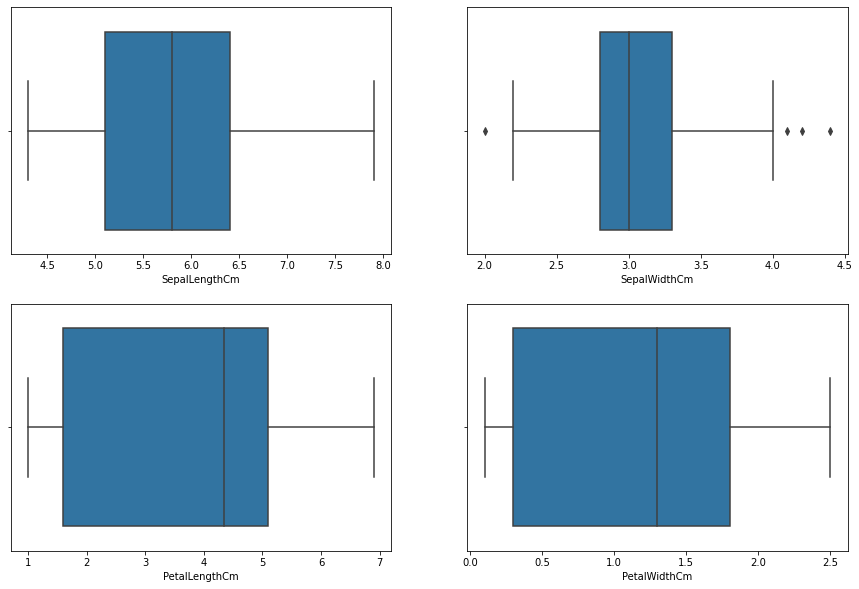

In [22]:
#Box plots - shows visual outliers in the data
plt.figure(1)
plt.figure(figsize = (15,10))
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in num_cols:
    plt.subplot(int(str(22)+str((num_cols.index(col)+1))))  
    sns.boxplot(x=col,  data=df)

In [23]:
# Check for any class Imbalance
df['Species'].value_counts(normalize = True)

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

Text(0, 0.5, 'Count')

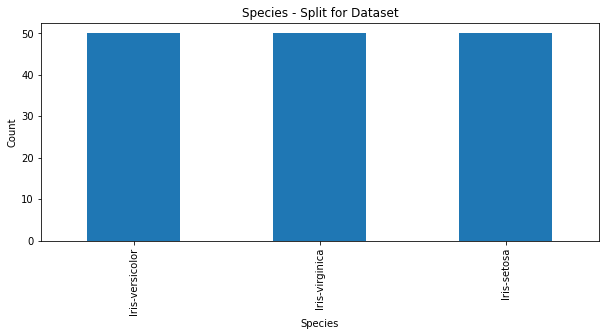

In [24]:
df['Species'].value_counts().plot.bar(figsize=(10,4),title='Species - Split for Dataset')
plt.xlabel('Species')
plt.ylabel('Count')

<Figure size 432x288 with 0 Axes>

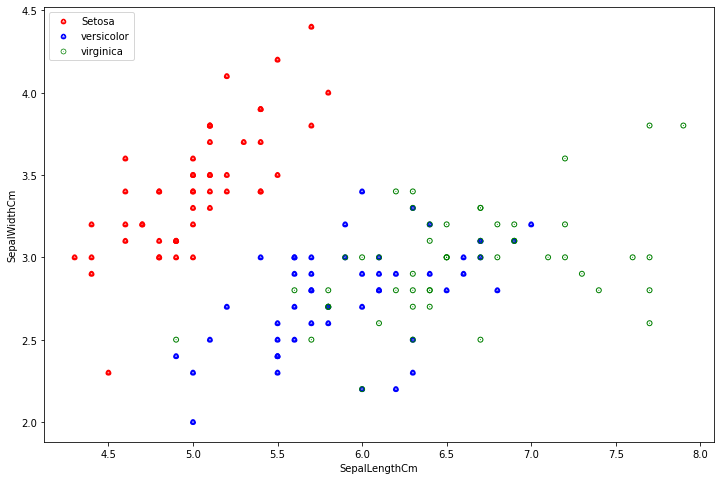

In [26]:
plt.figure(1)
plt.figure(figsize = (12,8))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], s=np.array(df.Species == 'Iris-setosa'), marker='^', c='red', linewidths=5)
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], s=np.array(df.Species == 'Iris-versicolor'), marker='^', c='blue', linewidths=5)
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], s=np.array(df.Species == 'Iris-virginica'), marker='o', c='green', linewidths=5)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(loc = 'upper left', labels =['Setosa', 'versicolor', 'virginica'])
plt.show()

<Figure size 432x288 with 0 Axes>

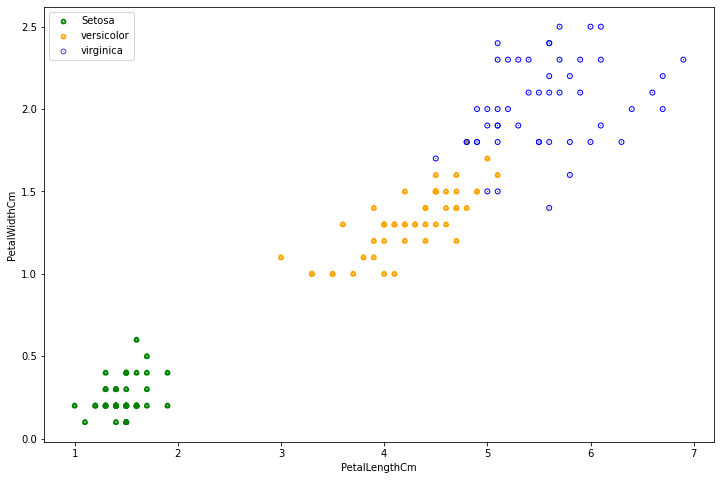

In [27]:
plt.figure(1)
plt.figure(figsize = (12,8))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], s=np.array(df.Species == 'Iris-setosa'), marker='^', c='green', linewidths=5)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], s=np.array(df.Species == 'Iris-versicolor'), marker='^', c='orange', linewidths=5)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], s=np.array(df.Species == 'Iris-virginica'), marker='o', c='blue', linewidths=5)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(loc = 'upper left', labels = ['Setosa', 'versicolor', 'virginica'])
plt.show()

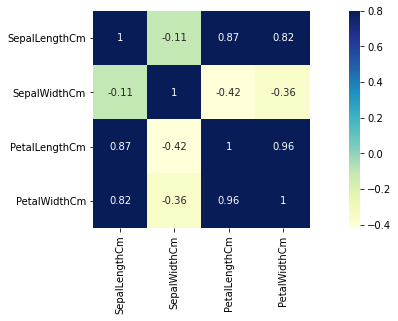

In [28]:
# Correlation between numerical variables
num_cols_data = (df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(14, 4))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu", annot = True);

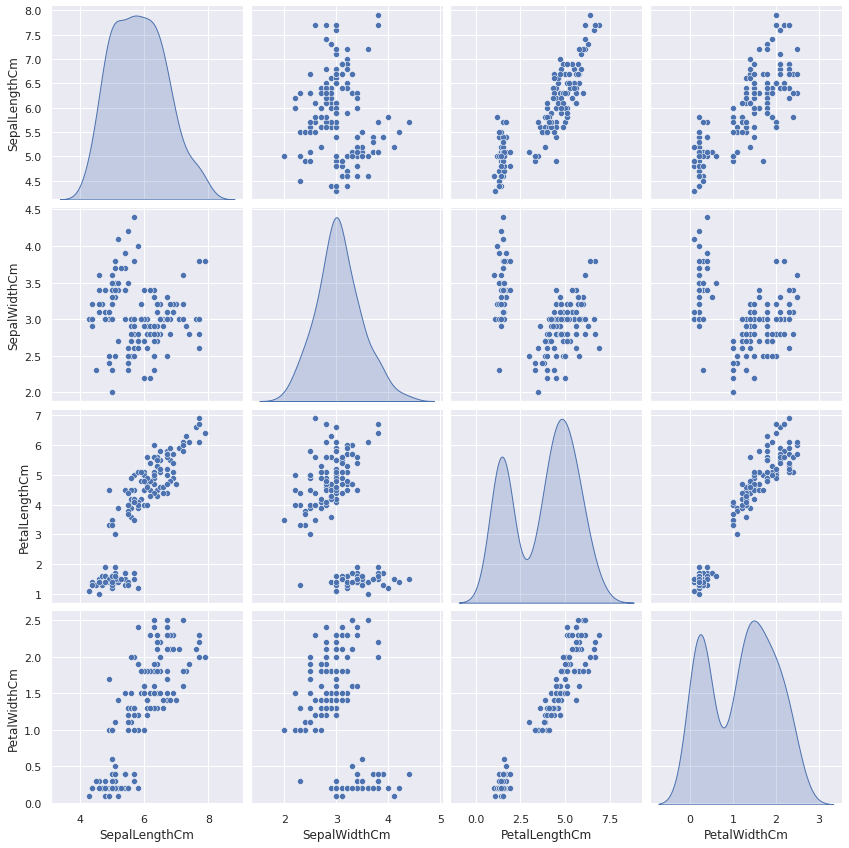

In [30]:
#Pair Plot
sns.set()
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sns.pairplot(df[columns],height=3 ,kind ='scatter',diag_kind='kde')
plt.show()

<Figure size 432x288 with 0 Axes>

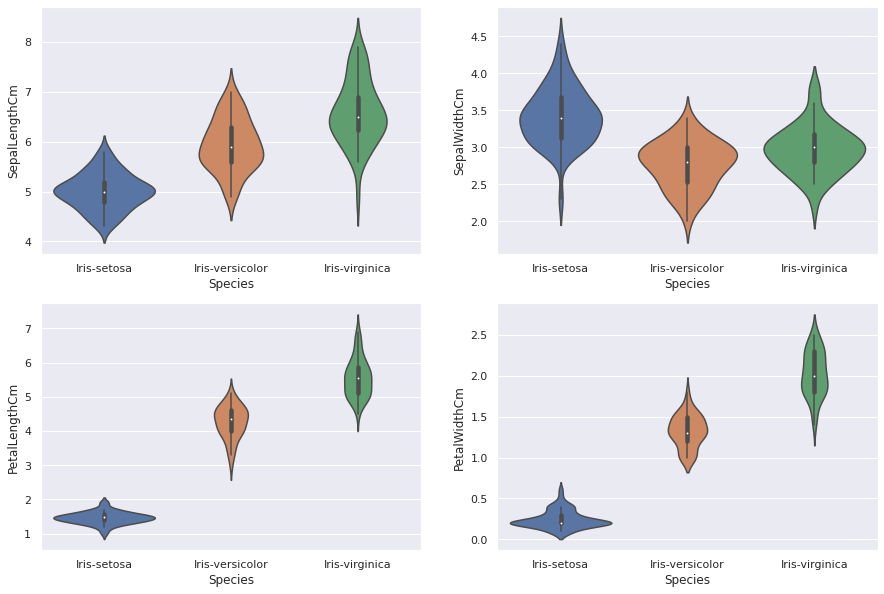

In [32]:
plt.figure(1)
plt.figure(figsize = (15,10))
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in num_cols:
  plt.subplot(int(str(22)+str((num_cols.index(col)+1))))
  sns.violinplot(x='Species', y = col, data = df)

In [33]:
#Check for missing values 
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
X = df.drop(['Id','Species'],1)
y = df.Species

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [36]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred_cv_train = model_log.predict(X_train)
pred_cv_test = model_log.predict(X_test)

In [38]:
print("the accuracy for train data is {}".format(accuracy_score(y_train,pred_cv_train)))
print("the accuracy for test data is {}".format(accuracy_score(y_test,pred_cv_test)))


the accuracy for train data is 0.9523809523809523
the accuracy for test data is 0.9777777777777777


the recall for this model is : 1.0
TP 11
TN 16
FP 0
FN 0


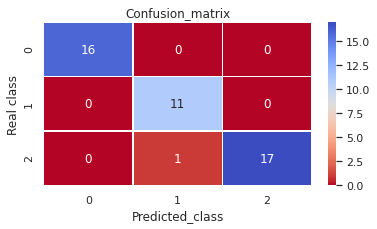

[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]

--------------------Classification Report------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [39]:
confusion_matrix = confusion_matrix( y_test,pred_cv_test)
print("the recall for this model is :",confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))

fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",confusion_matrix[1,1,]) 
print("TN",confusion_matrix[0,0]) 
print("FP",confusion_matrix[0,1]) 
print("FN",confusion_matrix[1,0]) 
sns.heatmap(confusion_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print(confusion_matrix)
print("\n--------------------Classification Report------------------------------------")
print(classification_report(y_test, pred_cv_test))

In [40]:
model_svm = svm.SVC() 
model_svm.fit(X_train,y_train) 
pred_cv_train = model_svm.predict(X_train)
pred_cv_test = model_svm.predict(X_test)
print("the accuracy for train data is {}".format(accuracy_score(y_train,pred_cv_train)))
print("the accuracy for test data is {}".format(accuracy_score(y_test,pred_cv_test)))

the accuracy for train data is 0.9523809523809523
the accuracy for test data is 0.9777777777777777


In [41]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred_cv_train = model_dt.predict(X_train)
pred_cv_test = model_dt.predict(X_test)
print("the accuracy for train data is {}".format(accuracy_score(y_train,pred_cv_train)))
print("the accuracy for test data is {}".format(accuracy_score(y_test,pred_cv_test)))

the accuracy for train data is 1.0
the accuracy for test data is 0.9555555555555556


In [50]:
model_knn=KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=35) #this examines 3 neighbours as one pool, for putting the new data into a class
model_knn.fit(X_train,y_train)
pred_cv_train = model_knn.predict(X_train)
pred_cv_test = model_knn.predict(X_test)
print("the accuracy for train data is {}".format(accuracy_score(y_train,pred_cv_train)))
print("the accuracy for test data is {}".format(accuracy_score(y_test,pred_cv_test)))

the accuracy for train data is 0.9809523809523809
the accuracy for test data is 0.9777777777777777


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


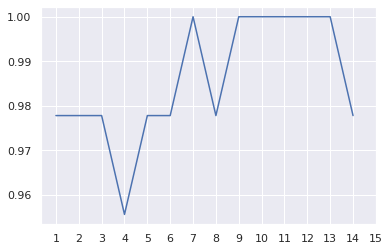

In [51]:
# We can identify the accuracy for which K-value this model gives best accuracy
index=list(range(1,15))
accur=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in list(range(1,15)):
  model=KNeighborsClassifier(n_neighbors=i) 
  model.fit(X_train,y_train)
  pred_test=model.predict(X_test)
  accur=accur.append(pd.Series(accuracy_score(pred_test,y_test)))
plt.plot(index, accur)
plt.xticks(x);